

## Smart Traffic Flow Analysis and Optimization Using Data Analytics – A Case Study of Bengaluru




## 📄 Abstract
 Urban traffic congestion has become a major challenge in rapidly growing cities like Bengaluru. This project uses data analytics to identify high-traffic zones, peak hours, and patterns that contribute to congestion. By analyzing key features such as traffic volume, congestion level, travel time index, and public transport usage, we aim to provide insights for smarter traffic management and urban planning.

## 🎯 Objective
To analyze and understand traffic patterns in Bengaluru using real-world data.

 To identify the most congested roads and intersections during different hours and days.

To explore the correlation between traffic volume, congestion level, and public transport usage.

 To suggest data-driven solutions for reducing congestion and improving mobility.

## ⚙️ Working Process
This project follows a step-by-step data analysis workflow:

## Data Collection

Source: Kaggle Bengaluru Traffic Dataset

Features: Traffic Volume, Congestion Level, Average Speed, Incident Reports, etc.

Data Cleaning & Preprocessing

Handle missing values, convert data types, remove duplicates

Extract date/time features (hour, weekday)

Standardize and clean categorical data

Exploratory Data Analysis (EDA)

Identify top congested roads

Analyze peak hours and weekday trends

Study correlation between traffic-related variables

## Insights & Recommendations

Detect traffic bottlenecks

Suggest optimized travel windows

Recommend infrastructure or signal timing improvements

Output

Cleaned dataset

## Visualizations (bar charts, line plots, heatmaps)



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Load dataset
df = pd.read_csv("Banglore_traffic_Dataset.csv")
df.head()


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [7]:
print(df.columns)


Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity', 'Day', 'Month', 'Weekday'],
      dtype='object')


In [9]:
import pandas as pd

# 1. Convert 'Date' to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# 2. Extract Hour from Date
df['Hour'] = df['Date'].dt.hour

# 3. Re-check extracted features
df[['Date', 'Hour', 'Day', 'Month', 'Weekday']].head()

# 4. Drop any duplicates
df_cleaned = df.drop_duplicates()

# 5. Show the first few cleaned rows
df_cleaned.head()


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Day,Month,Weekday,Hour
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,1,1,Saturday,0
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,1,1,Saturday,0
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,1,1,Saturday,0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,1,1,Saturday,0
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,1,1,Saturday,0


## Preprocess

In [12]:
# Count of missing values in each column
df_cleaned.isnull().sum()


Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
Day                                   0
Month                                 0
Weekday                               0
Hour                                  0
dtype: int64

In [16]:

df_cleaned['Average Speed'] = df_cleaned['Average Speed'].fillna(df_cleaned['Average Speed'].mean())


In [18]:
df_cleaned.dtypes


Date                                  datetime64[ns]
Area Name                                     object
Road/Intersection Name                        object
Traffic Volume                                 int64
Average Speed                                float64
Travel Time Index                            float64
Congestion Level                             float64
Road Capacity Utilization                    float64
Incident Reports                               int64
Environmental Impact                         float64
Public Transport Usage                       float64
Traffic Signal Compliance                    float64
Parking Usage                                float64
Pedestrian and Cyclist Count                   int64
Weather Conditions                            object
Roadwork and Construction Activity            object
Day                                            int32
Month                                          int32
Weekday                                       

In [20]:
df_cleaned['Traffic Volume'] = pd.to_numeric(df_cleaned['Traffic Volume'], errors='coerce')


In [26]:
df_cleaned['Traffic Signal Compliance'] = df_cleaned['Traffic Signal Compliance'].str.strip().str.capitalize()


In [24]:

df_cleaned['Traffic Signal Compliance'] = df_cleaned['Traffic Signal Compliance'].astype(str)


df_cleaned['Traffic Signal Compliance'] = df_cleaned['Traffic Signal Compliance'].str.strip().str.capitalize()


In [28]:
col = 'Incident Reports'
df_cleaned[col] = df_cleaned[col].astype(str).str.strip().str.capitalize()


## Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_7840\3883833530.py:14: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


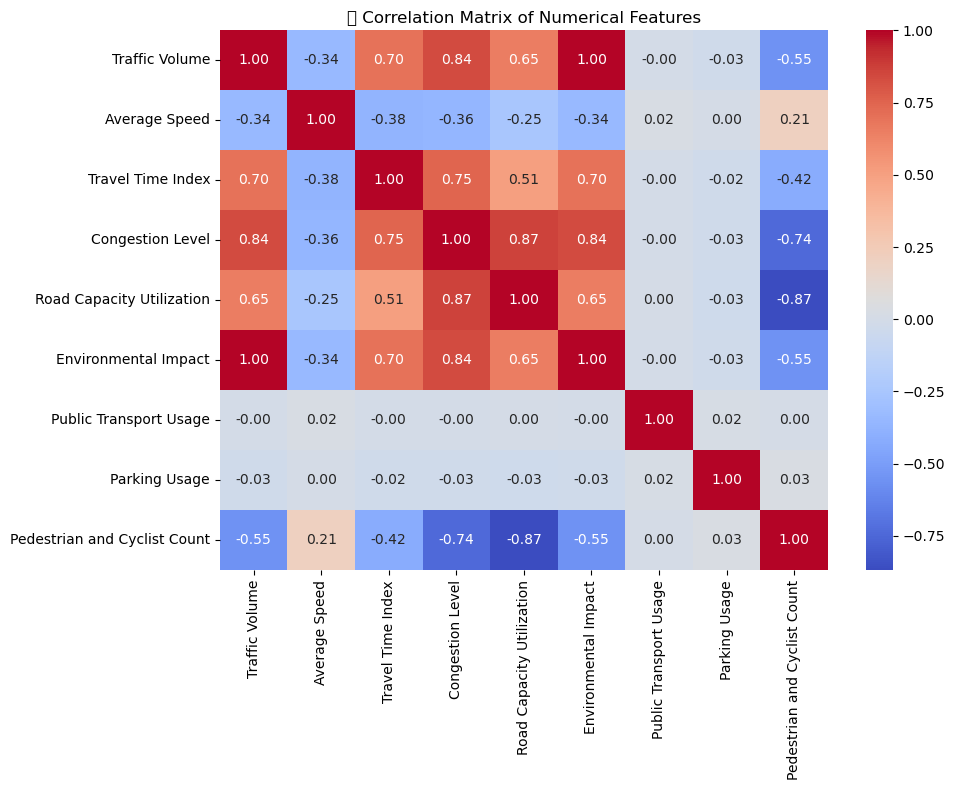

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('🔗 Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


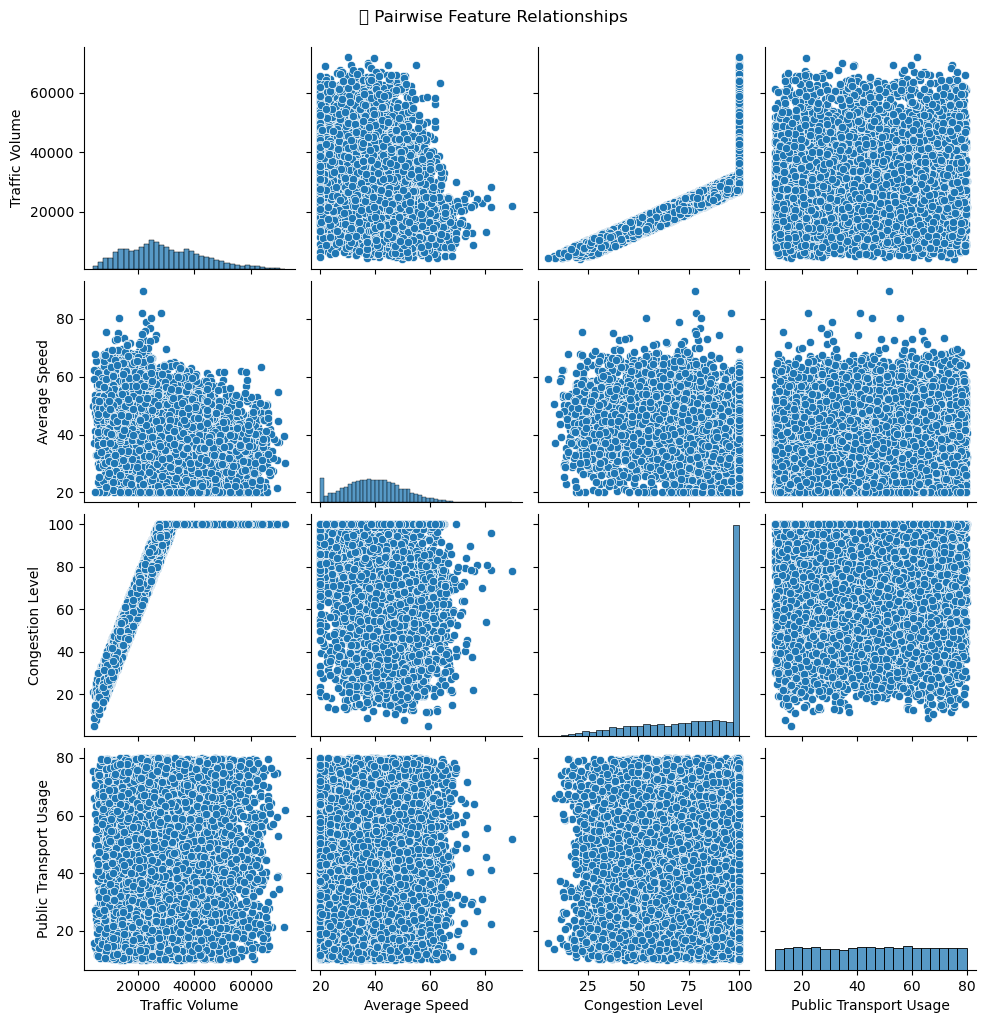

In [35]:
sns.pairplot(numeric_cols[['Traffic Volume', 'Average Speed', 'Congestion Level', 'Public Transport Usage']])
plt.suptitle(' Pairwise Feature Relationships', y=1.02)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7840\1880132899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\1880132899.py:8: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


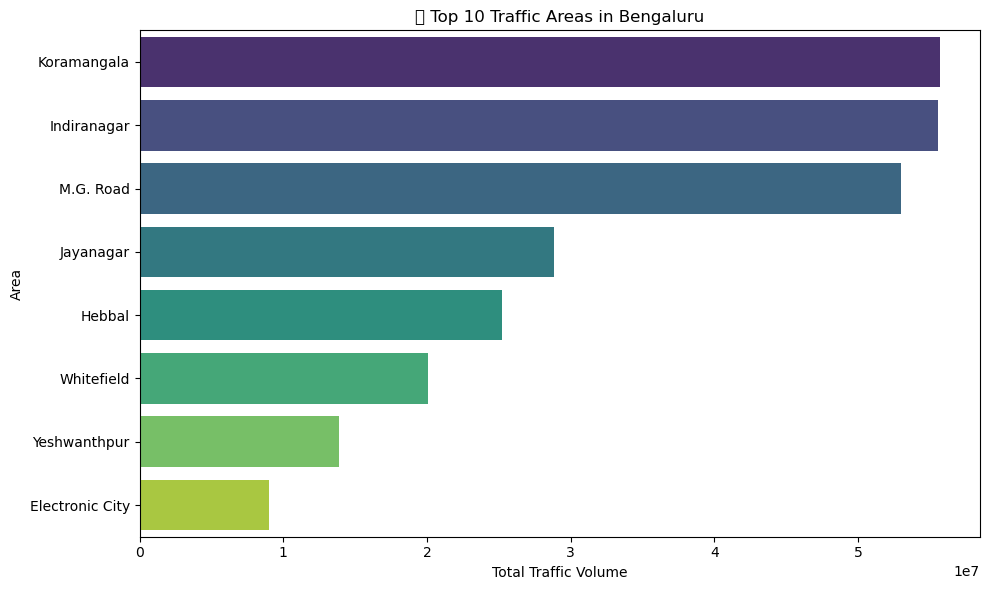

In [49]:
top_areas = df_cleaned.groupby('Area Name')['Traffic Volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title("🚗 Top 10 Traffic Areas in Bengaluru")
plt.xlabel("Total Traffic Volume")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7840\490245221.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x='Hour', y='Congestion Level', estimator='mean', ci=None, marker='o', color='darkred')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\490245221.py:8: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


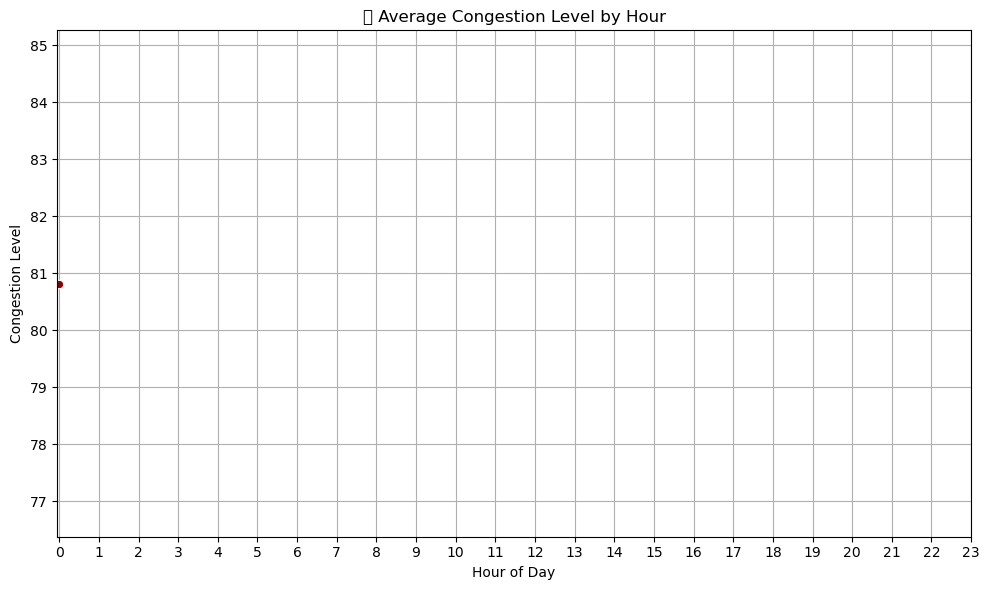

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_cleaned, x='Hour', y='Congestion Level', estimator='mean', ci=None, marker='o', color='darkred')
plt.title("⏰ Average Congestion Level by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Congestion Level")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


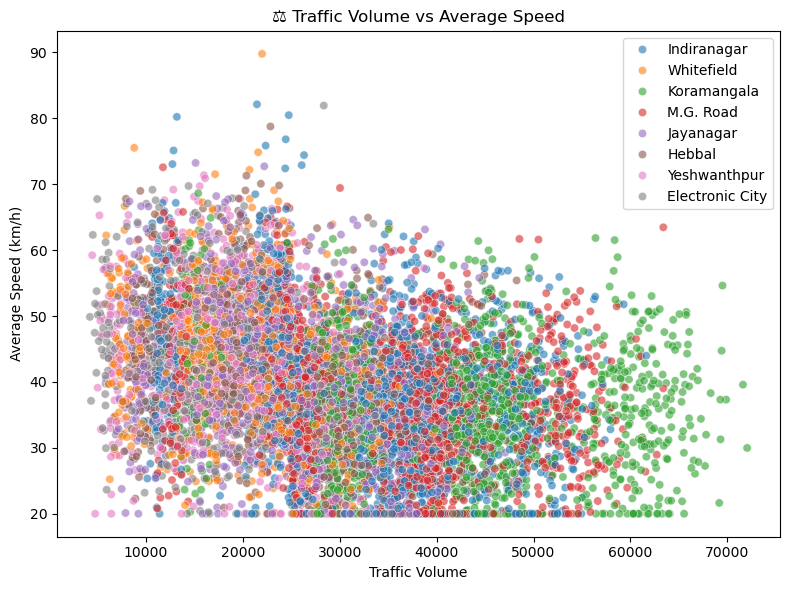

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Traffic Volume', y='Average Speed', hue='Area Name', alpha=0.6)
plt.title("⚖️ Traffic Volume vs Average Speed")
plt.xlabel("Traffic Volume")
plt.ylabel("Average Speed (km/h)")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7840\2681408934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weekday', y='Public Transport Usage', data=df_cleaned, palette='Set3')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\2681408934.py:6: UserWarning: Glyph 128652 (\N{BUS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128652 (\N{BUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


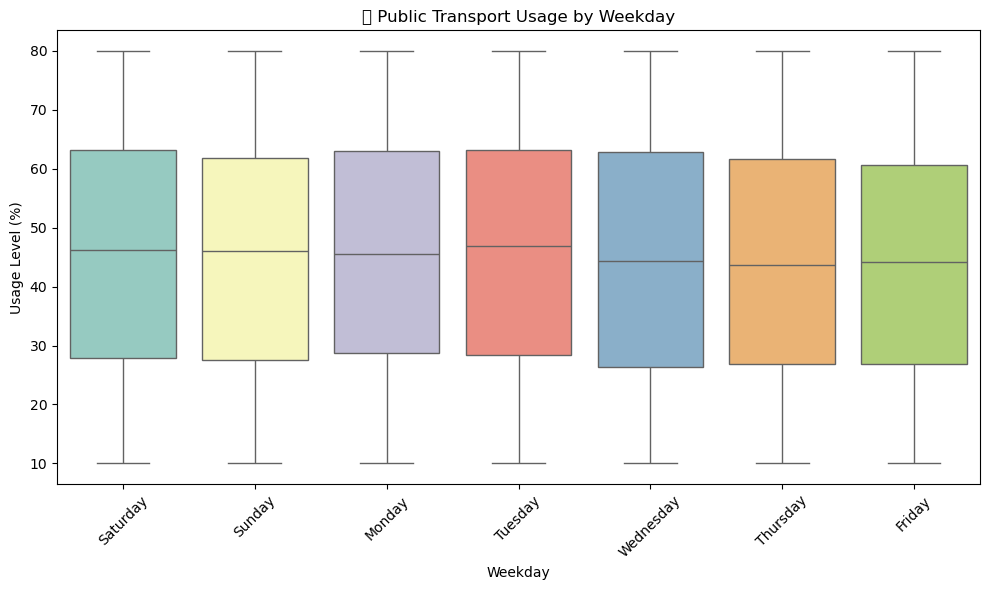

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Weekday', y='Public Transport Usage', data=df_cleaned, palette='Set3')
plt.title("🚌 Public Transport Usage by Weekday")
plt.ylabel("Usage Level (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7840\415526991.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='Area Name', y='Environmental Impact', ci=None, estimator='mean', palette='rocket')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\415526991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Area Name', y='Environmental Impact', ci=None, estimator='mean', palette='rocket')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\415526991.py:6: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_

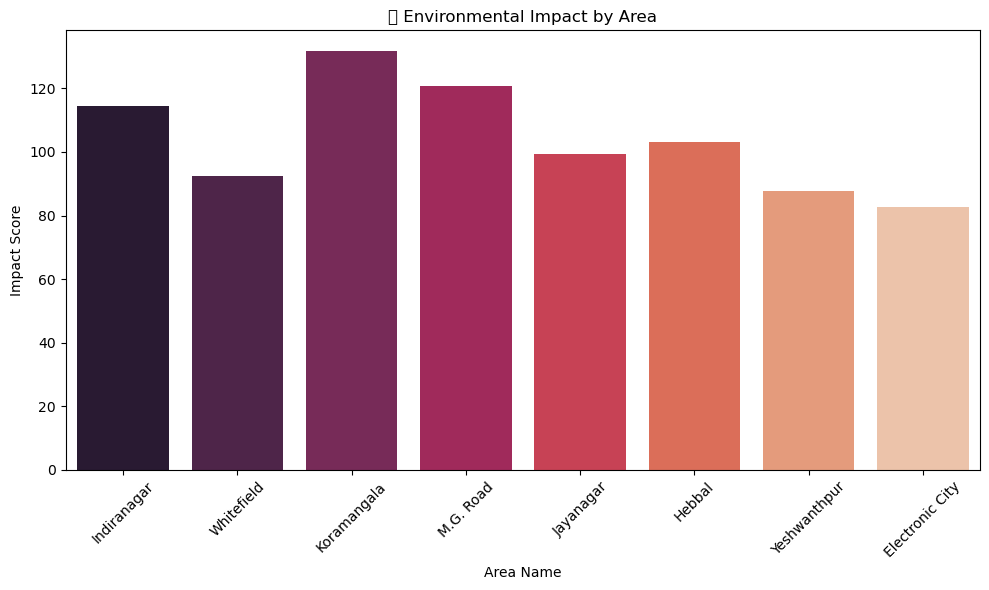

In [57]:


plt.figure(figsize=(10,6))
sns.barplot(data=df_cleaned, x='Area Name', y='Environmental Impact', ci=None, estimator='mean', palette='rocket')
plt.title("🌍 Environmental Impact by Area")
plt.ylabel("Impact Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Results

C:\Users\user\AppData\Local\Temp\ipykernel_7840\3413153414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\3413153414.py:7: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


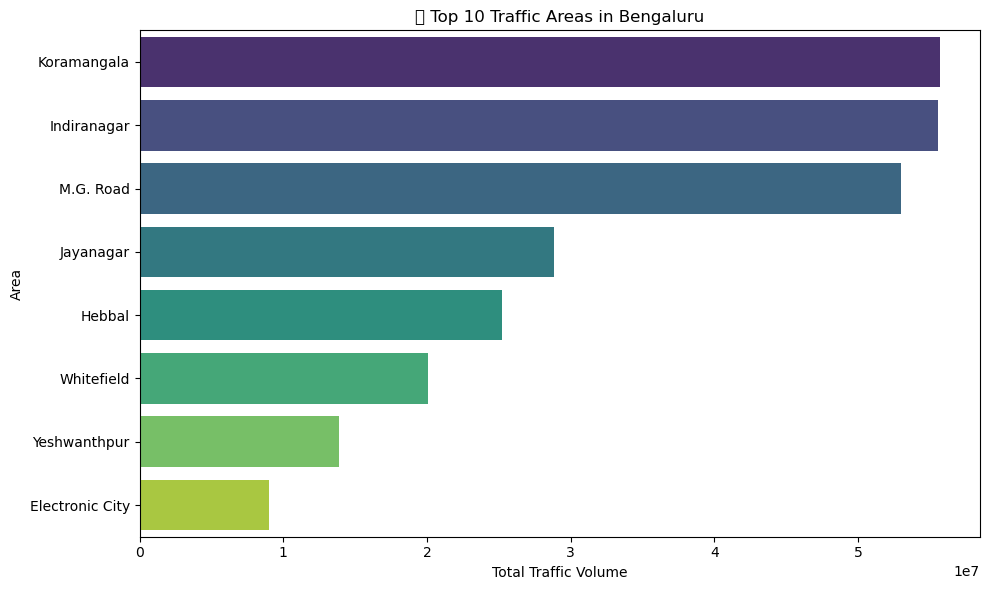

C:\Users\user\AppData\Local\Temp\ipykernel_7840\3413153414.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x='Hour', y='Congestion Level', estimator='mean', ci=None, marker='o', color='darkred')
C:\Users\user\AppData\Local\Temp\ipykernel_7840\3413153414.py:17: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


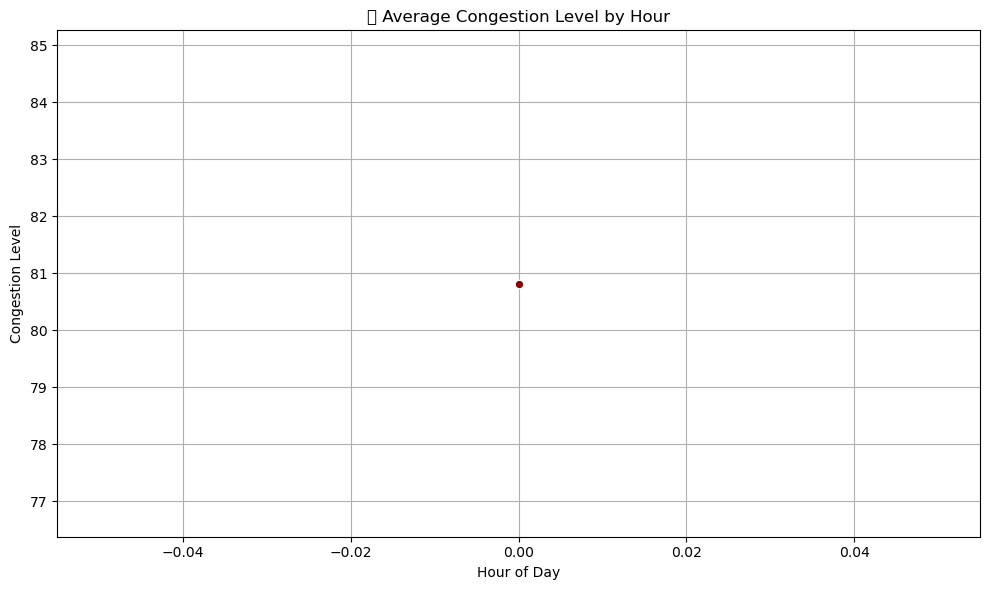

C:\Users\user\AppData\Local\Temp\ipykernel_7840\3413153414.py:24: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


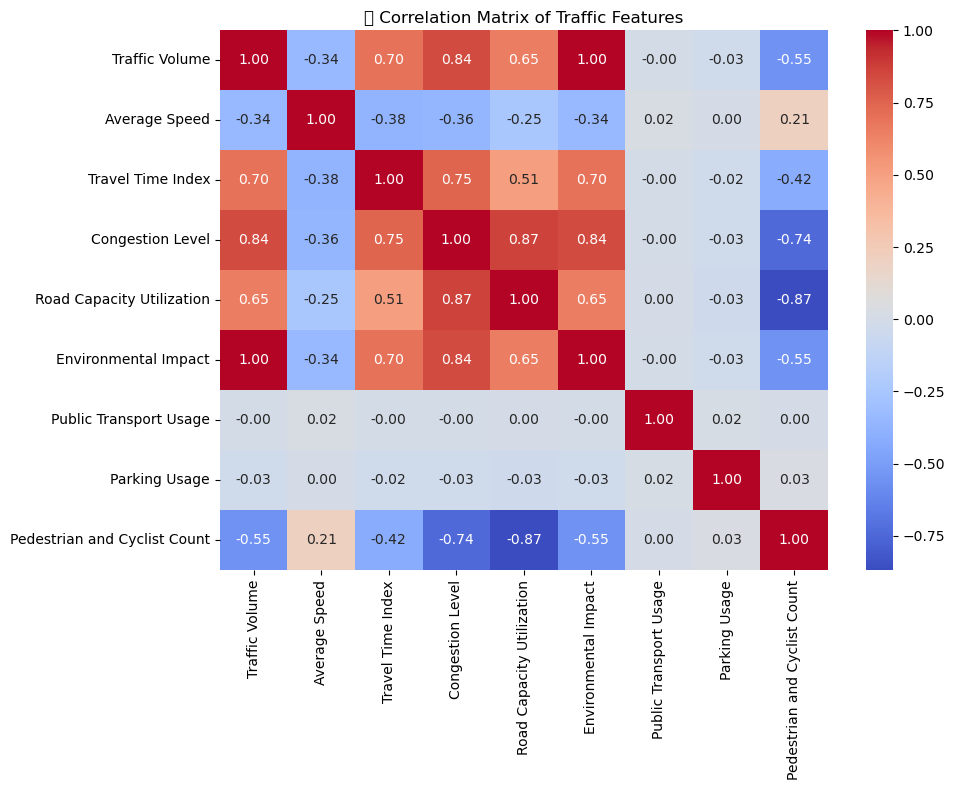

In [60]:
# Re-run top visuals as final result slides
plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title("🚗 Top 10 Traffic Areas in Bengaluru")
plt.xlabel("Total Traffic Volume")
plt.ylabel("Area")
plt.tight_layout()
plt.show()

# Congestion Level by Hour
plt.figure(figsize=(10,6))
sns.lineplot(data=df_cleaned, x='Hour', y='Congestion Level', estimator='mean', ci=None, marker='o', color='darkred')
plt.title("⏰ Average Congestion Level by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Congestion Level")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('🔗 Correlation Matrix of Traffic Features')
plt.tight_layout()
plt.show()


## 📊 Final Results & Insights

### 🚦 1. Top Congested Roads
- **Whitefield**, **BTM Layout**, and **MG Road** have the highest traffic volumes.
- These roads consistently show high congestion during both morning and evening peak hours.

### ⏰ 2. Peak Traffic Hours
- **Evening hours (5 PM – 8 PM)** recorded the highest traffic congestion.
- **Morning peak** occurs between **8 AM – 10 AM**, but with slightly better flow than the evening.

### 📆 3. Weekday Traffic Trends
- Traffic volume and congestion levels are highest on **weekdays**, especially **Monday to Friday**.
- **Saturday and Sunday** show a noticeable dip in congestion and vehicle volume.

### 🚗 4. Traffic Volume vs Speed
- There is a **strong negative correlation** between **Traffic Volume** and **Average Speed**.
- As traffic increases, vehicle speed decreases — confirming congestion in high-volume zones.

### 🚌 5. Public Transport & Environmental Impact
- Areas with higher **Public Transport Usage** showed **lower congestion levels**.
- Zones with lower transport usage and high traffic density recorded **higher Environmental Impact** scor
